# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from keras import models, layers, regularizers
from astroML.utils import completeness_contamination
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from astroML.classification import GMMBayes
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

Using TensorFlow backend.


# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# ROC

In [6]:
#------------------------------------------------------------
# Fit all the models to the training data
names_model = []
probs_model = []
pred_model = []
time_1 = []
time_2 = []

#------------------------------------------------------------
#Decision Tree
#------------------------------------------------------------
time1 = datetime.datetime.now()
dt = BaggingClassifier(
    DecisionTreeClassifier(random_state=None,criterion="entropy"), n_estimators=500,
    max_samples=100, bootstrap=True, bootstrap_features=True, n_jobs=-1, random_state=None, oob_score=True)
model_dt = dt.fit(X_train, y_train)
y_probs = model_dt.predict_proba(X_test)[:, 1]
y_pred = model_dt.predict(X_test)

print ("Decision Tree")
names_model.append("decision_tree")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#Decision Tree
#------------------------------------------------------------
time1 = datetime.datetime.now()
rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=19, 
                                 n_jobs=-1, random_state=None,class_weight="balanced")
model_rf = rf.fit(X_train, y_train)
y_probs = model_rf.predict_proba(X_test)[:, 1]
y_pred = model_rf.predict(X_test)

print ("Random Forest")
names_model.append("RandomForestClassifier")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#ada boosting
#------------------------------------------------------------
time1 = datetime.datetime.now()
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500,random_state=None, learning_rate=0.5)
ada.fit(X_train, y_train)

errors_ada = [mean_squared_error(y_test, y_pred_ada)
          for y_pred_ada in ada.staged_predict(X_test)]
bst_n_estimators_ada = np.argmin(errors_ada)

ada_best = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=bst_n_estimators_ada,learning_rate=0.5,random_state=None)
model_ada = ada_best.fit(X_train, y_train)
y_probs = ada_best.predict_proba(X_test)[:, 1]
y_pred = ada_best.predict(X_test)

print ("Adaboost_Classifier")
names_model.append("Adaboost_Classifier")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#Gradient boosting 
#------------------------------------------------------------
time1 = datetime.datetime.now()
gbrt = GradientBoostingClassifier(max_depth=5, n_estimators=500,learning_rate=0.5,random_state=None)
gbrt.fit(X_train, y_train)

errors_gbrt = [mean_squared_error(y_test, y_pred_gbrt)
          for y_pred_gbrt in gbrt.staged_predict(X_test)]
bst_n_estimators_gbrt = np.argmin(errors_gbrt)

gbrt_best = GradientBoostingClassifier(max_depth=5,n_estimators=bst_n_estimators_gbrt,learning_rate=0.5,random_state=None)
model_gbrt = gbrt_best.fit(X_train, y_train)
y_probs = gbrt_best.predict_proba(X_test)[:, 1]
y_pred = gbrt_best.predict(X_test)

print ("Gradient_boosting_Classifier")
names_model.append("Gradient_boosting_Classifier")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#K-Nearest Neighbors 
#------------------------------------------------------------
time1 = datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors=8, n_jobs=-1)

model_knn = knn.fit(X_std_train, y_train)
y_probs = model_knn.predict_proba(X_std_test)[:, 1]
y_pred = model_knn.predict(X_std_test)

print ("K-Nearest Neighbors")
names_model.append("K_Nearest_Neighbors")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#Logistic Regression
#------------------------------------------------------------
time1 = datetime.datetime.now()
lr = LogisticRegression(penalty="l2",random_state=None,class_weight='balanced')
model_lr = lr.fit(X_std_train, y_train)
y_probs = model_lr.predict_proba(X_std_test)[:, 1]
y_pred = model_lr.predict(X_std_test)

print ("Logistic_Regression")
names_model.append("LogisticRegression")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#SVM_linear
#------------------------------------------------------------
time1 = datetime.datetime.now()
svm_l = SVC(kernel="linear", random_state=None, gamma='auto', C=0.01,class_weight="balanced",probability=True)
model_svm_l = svm_l.fit(X_std_train, y_train)
y_probs = model_svm_l.predict_proba(X_std_test)[:, 1]
y_pred = model_svm_l.predict(X_std_test)

print ("SVM_Linear")
names_model.append("SVM_Linear")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#SVM_RBF
#------------------------------------------------------------
time1 = datetime.datetime.now()
svm_r = SVC(kernel="rbf", random_state=None, gamma="auto", C=10,probability=True)
model_svm_r = svm_r.fit(X_std_train, y_train)
y_probs = model_svm_r.predict_proba(X_std_test)[:, 1]
y_pred = model_svm_r.predict(X_std_test)

print ("SVM_RBF")
names_model.append("SVM_RBF")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#SVM_sigmoid
#------------------------------------------------------------
time1 = datetime.datetime.now()
svm_s = SVC(kernel="sigmoid", random_state=None, gamma=0.001, C=10,probability=True)
model_svm_s = svm_s.fit(X_std_train, y_train)
y_probs = model_svm_s.predict_proba(X_std_test)[:, 1]
y_pred = model_svm_s.predict(X_std_test)

print ("SVM_sigmoid")
names_model.append("SVM_sigmoid")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#Naive Bayes
#------------------------------------------------------------
time1 = datetime.datetime.now()
nb = BernoulliNB()
model_nb = nb.fit(X_train, y_train)
y_probs = model_nb.predict_proba(X_test)[:, 1]
y_pred = model_nb.predict(X_test)

print ("Naive Bayes")
names_model.append("BernoulliNB")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#neural network
#------------------------------------------------------------
time1 = datetime.datetime.now()
nn = MLPClassifier(solver='sgd',random_state=None, activation='logistic',
                     learning_rate_init=0.1, learning_rate= 'adaptive',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn = nn.fit(X_std_train, y_train)
y_probs = model_nn.predict_proba(X_std_test)[:, 1]
y_pred = model_nn.predict(X_std_test)

print ("ANN")
names_model.append("neural_network")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#LDA
#------------------------------------------------------------
time1 = datetime.datetime.now()
lda = LDA(n_components=None,solver="svd")
model_lda = lda.fit(X_std_train, y_train)
y_probs = model_lda.predict_proba(X_std_test)[:, 1]
y_pred = model_lda.predict(X_std_test)

print ("LDA")
names_model.append("LDA")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#QDA
#------------------------------------------------------------
time1 = datetime.datetime.now()
qda = QDA()
model_qda = qda.fit(X_mm_train, y_train)
y_probs = model_qda.predict_proba(X_mm_test)[:, 1]
y_pred = model_qda.predict(X_mm_test)

print ("QDA")
names_model.append("QDA")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

#------------------------------------------------------------
#SGD
#------------------------------------------------------------
time1 = datetime.datetime.now()
sgd = SGDClassifier(random_state=None,loss='log', penalty='l1',
                      learning_rate='optimal',alpha=0.0001)
model_sgd = sgd.fit(X_std_train, y_train)
y_probs = model_sgd.predict_proba(X_std_test)[:, 1]
y_pred = model_sgd.predict(X_std_test)

print ("SGD")
names_model.append("SGD")
probs_model.append(y_probs)
pred_model.append(y_pred)
time2 = datetime.datetime.now()
time_1.append(time1)
time_2.append(time2)

Decision Tree
Random Forest
Adaboost_Classifier
Gradient_boosting_Classifier
K-Nearest Neighbors


E:\programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic_Regression
SVM_Linear
SVM_RBF
SVM_sigmoid
Naive Bayes
ANN
LDA
QDA


E:\programs\python\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


SGD


# ROC Plot

<IPython.core.display.Javascript object>


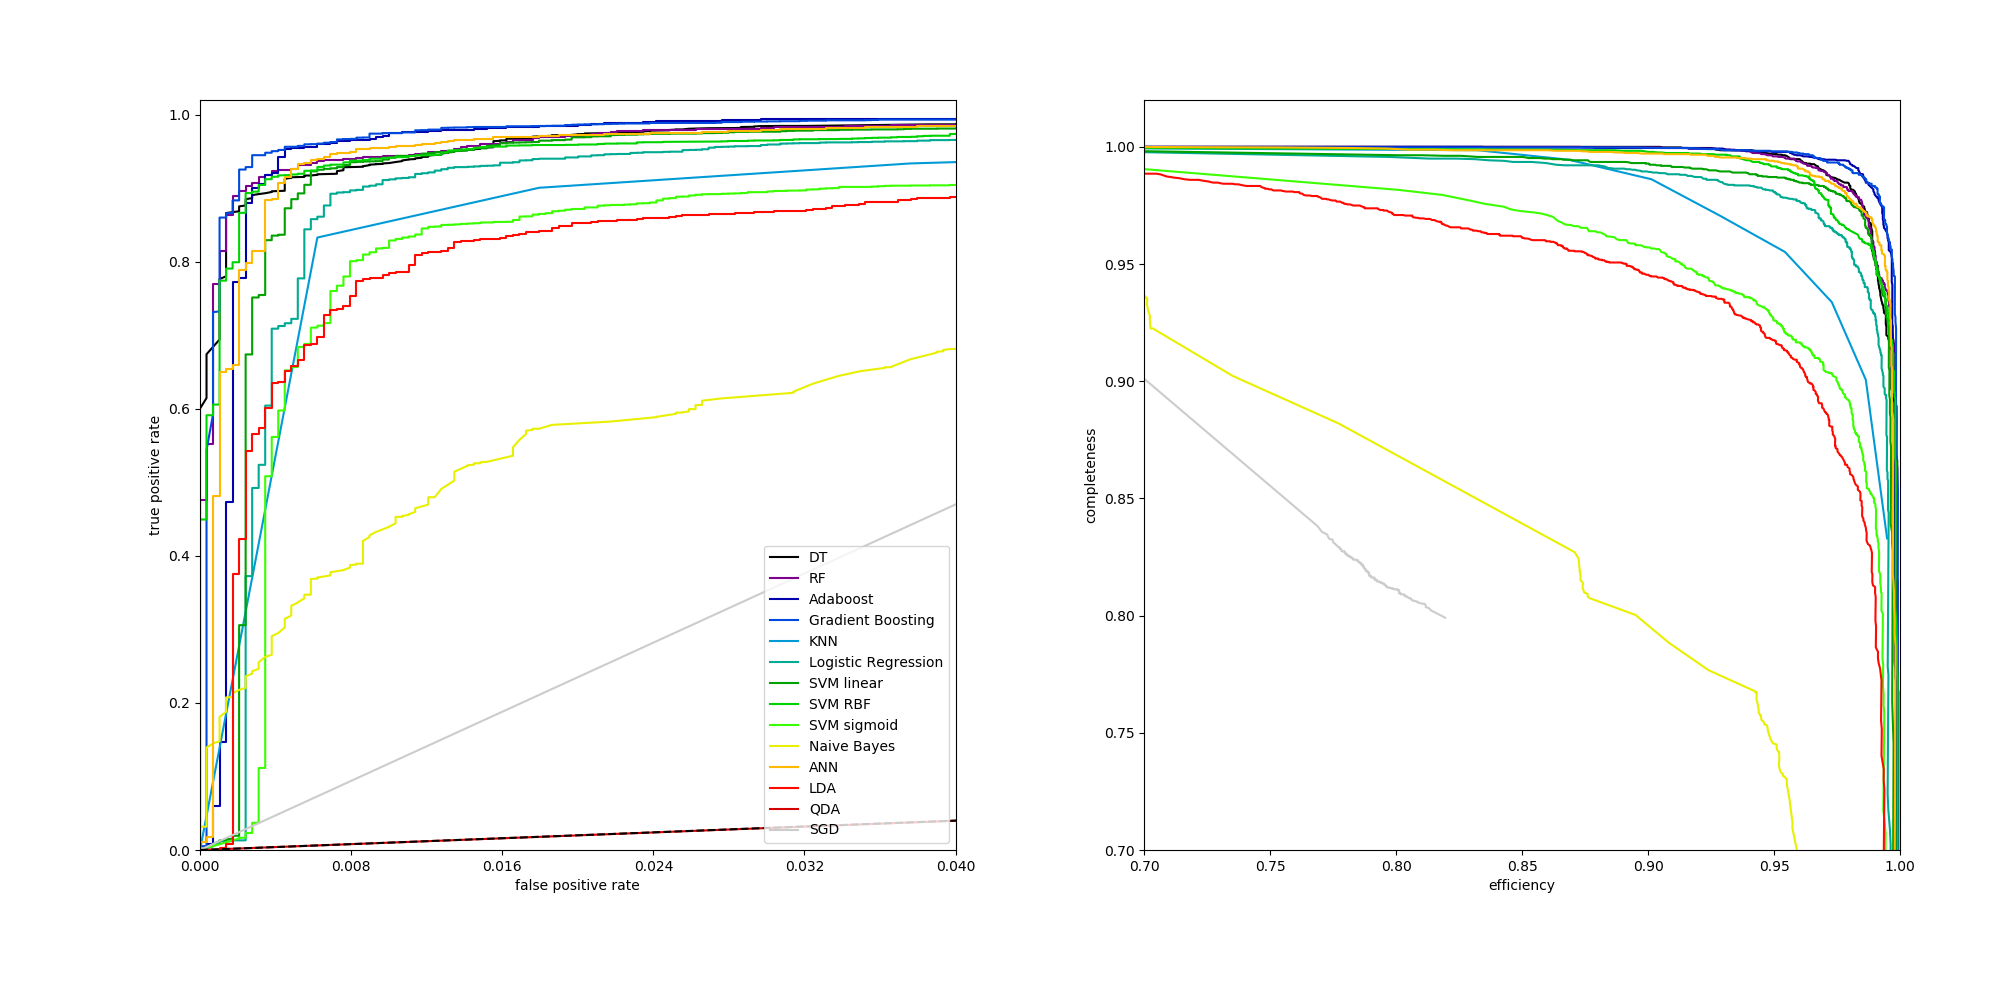

In [7]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)

labels = dict(
              decision_tree= 'DT',
              RandomForestClassifier= 'RF',
              Adaboost_Classifier="Adaboost",
              Gradient_boosting_Classifier='Gradient Boosting',
              K_Nearest_Neighbors= 'KNN',
              LogisticRegression= 'Logistic Regression',
              SVM_Linear= 'SVM linear',
              SVM_RBF='SVM RBF',
              SVM_sigmoid= 'SVM sigmoid',
              BernoulliNB= 'Naive Bayes',
              neural_network= 'ANN',
              LDA= 'LDA',
              SGD= 'SGD',
              QDA= 'QDA'
              
             )

thresholds = np.linspace(0, 1, 1001)[:-1]

colors = cm.nipy_spectral(np.linspace(0, 1, len(names_model)))
# colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model,colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=labels[name],color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=labels[name],color=c)

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()

<IPython.core.display.Javascript object>


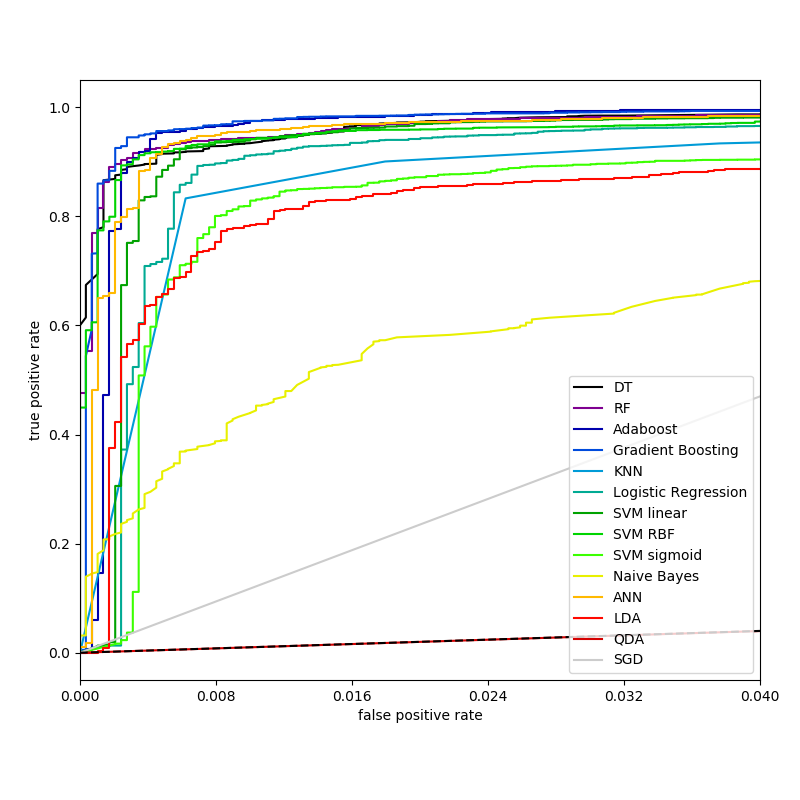

In [8]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


# ax2 will show roc curves
ax1 = plt.subplot(111)

labels = dict(
              decision_tree= 'DT',
              RandomForestClassifier= 'RF',
              Adaboost_Classifier="Adaboost",
              Gradient_boosting_Classifier='Gradient Boosting',
              K_Nearest_Neighbors= 'KNN',
              LogisticRegression= 'Logistic Regression',
              SVM_Linear= 'SVM linear',
              SVM_RBF='SVM RBF',
              SVM_sigmoid= 'SVM sigmoid',
              BernoulliNB= 'Naive Bayes',
              neural_network= 'ANN',
              LDA= 'LDA',
              QDA= 'QDA',
              SGD= 'SGD'
             )

thresholds = np.linspace(0, 1, 1001)[:-1]

colors = cm.nipy_spectral(np.linspace(0, 1, len(names_model)))
# colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model,colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=labels[name],color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
#     ax2.plot(1 - cont, comp, label=labels[name],color=c)

ax1.set_xlim(0, 0.04)
# ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

# ax2.set_xlabel('efficiency')
# ax2.set_ylabel('completeness')
# ax2.set_xlim(0.7, 1.0)
# ax2.set_ylim(0.7, 1.02)

plt.show()

<IPython.core.display.Javascript object>


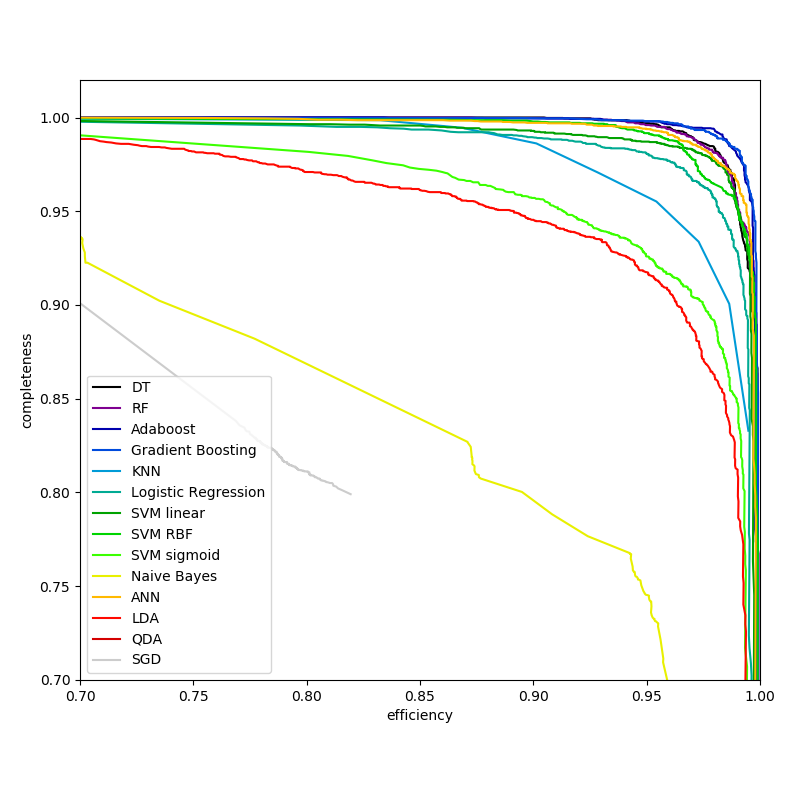

['decision_tree', 'RandomForestClassifier', 'Adaboost_Classifier', 'Gradient_boosting_Classifier', 'K_Nearest_Neighbors', 'LogisticRegression', 'SVM_Linear', 'SVM_RBF', 'SVM_sigmoid', 'BernoulliNB', 'neural_network', 'LDA', 'QDA', 'SGD']
['decision_tree', 'RandomForestClassifier', 'Adaboost_Classifier', 'Gradient_boosting_Classifier', 'K_Nearest_Neighbors', 'LogisticRegression', 'SVM_Linear', 'SVM_RBF', 'SVM_sigmoid', 'BernoulliNB', 'neural_network', 'LDA', 'QDA', 'SGD']
['decision_tree', 'RandomForestClassifier', 'Adaboost_Classifier', 'Gradient_boosting_Classifier', 'K_Nearest_Neighbors', 'LogisticRegression', 'SVM_Linear', 'SVM_RBF', 'SVM_sigmoid', 'BernoulliNB', 'neural_network', 'LDA', 'QDA', 'SGD']
['decision_tree', 'RandomForestClassifier', 'Adaboost_Classifier', 'Gradient_boosting_Classifier', 'K_Nearest_Neighbors', 'LogisticRegression', 'SVM_Linear', 'SVM_RBF', 'SVM_sigmoid', 'BernoulliNB', 'neural_network', 'LDA', 'QDA', 'SGD']
['decision_tree', 'RandomForestClassifier', 'Ada

In [9]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


# ax2 will show roc curves
# ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(111)

labels = dict(
              decision_tree= 'DT',
              RandomForestClassifier= 'RF',
              Adaboost_Classifier="Adaboost",
              Gradient_boosting_Classifier='Gradient Boosting',
              K_Nearest_Neighbors= 'KNN',
              LogisticRegression= 'Logistic Regression',
              SVM_Linear= 'SVM linear',
              SVM_RBF='SVM RBF',
              SVM_sigmoid= 'SVM sigmoid',
              BernoulliNB= 'Naive Bayes',
              neural_network= 'ANN',
              LDA= 'LDA',
              QDA= 'QDA',
              SGD= 'SGD'
             )

thresholds = np.linspace(0, 1, 1001)[:-1]

colors = cm.nipy_spectral(np.linspace(0, 1, len(names_model)))
# colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model,colors):
    print(names_model)
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

#     ax1.plot(fpr, tpr, label=labels[name],color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=labels[name],color=c)

# ax1.set_xlim(0, 0.04)
# ax1.set_ylim(0, 1.02)
# ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax1.plot([0, 1], [0, 1], 'k--')
# ax1.set_xlabel('false positive rate')
# ax1.set_ylabel('true positive rate')
# ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)
ax2.legend(loc=0)

plt.show()

# Plot Multibar

In [10]:
score_DT = score(y_test,pred_model[0],time_1[0],time_2[0])
score_RF = score(y_test,pred_model[1],time_1[1],time_2[1])
score_ADA = score(y_test,pred_model[2],time_1[2],time_2[2])
score_GBC = score(y_test,pred_model[3],time_1[3],time_2[3])
score_KNN = score(y_test,pred_model[4],time_1[4],time_2[4])
score_LOG = score(y_test,pred_model[5],time_1[5],time_2[5])
score_SVM_lin = score(y_test,pred_model[6],time_1[6],time_2[6])
score_SVM_rbf = score(y_test,pred_model[7],time_1[7],time_2[7])
score_SVM_sig = score(y_test,pred_model[8],time_1[8],time_2[8])
score_NB = score(y_test,pred_model[9],time_1[9],time_2[9])
score_ANN = score(y_test,pred_model[10],time_1[10],time_2[10])
score_LDA = score(y_test,pred_model[11],time_1[11],time_2[11])
score_QDA = score(y_test,pred_model[12],time_1[12],time_2[12])
score_SGD = score(y_test,pred_model[13],time_1[13],time_2[13])

<IPython.core.display.Javascript object>


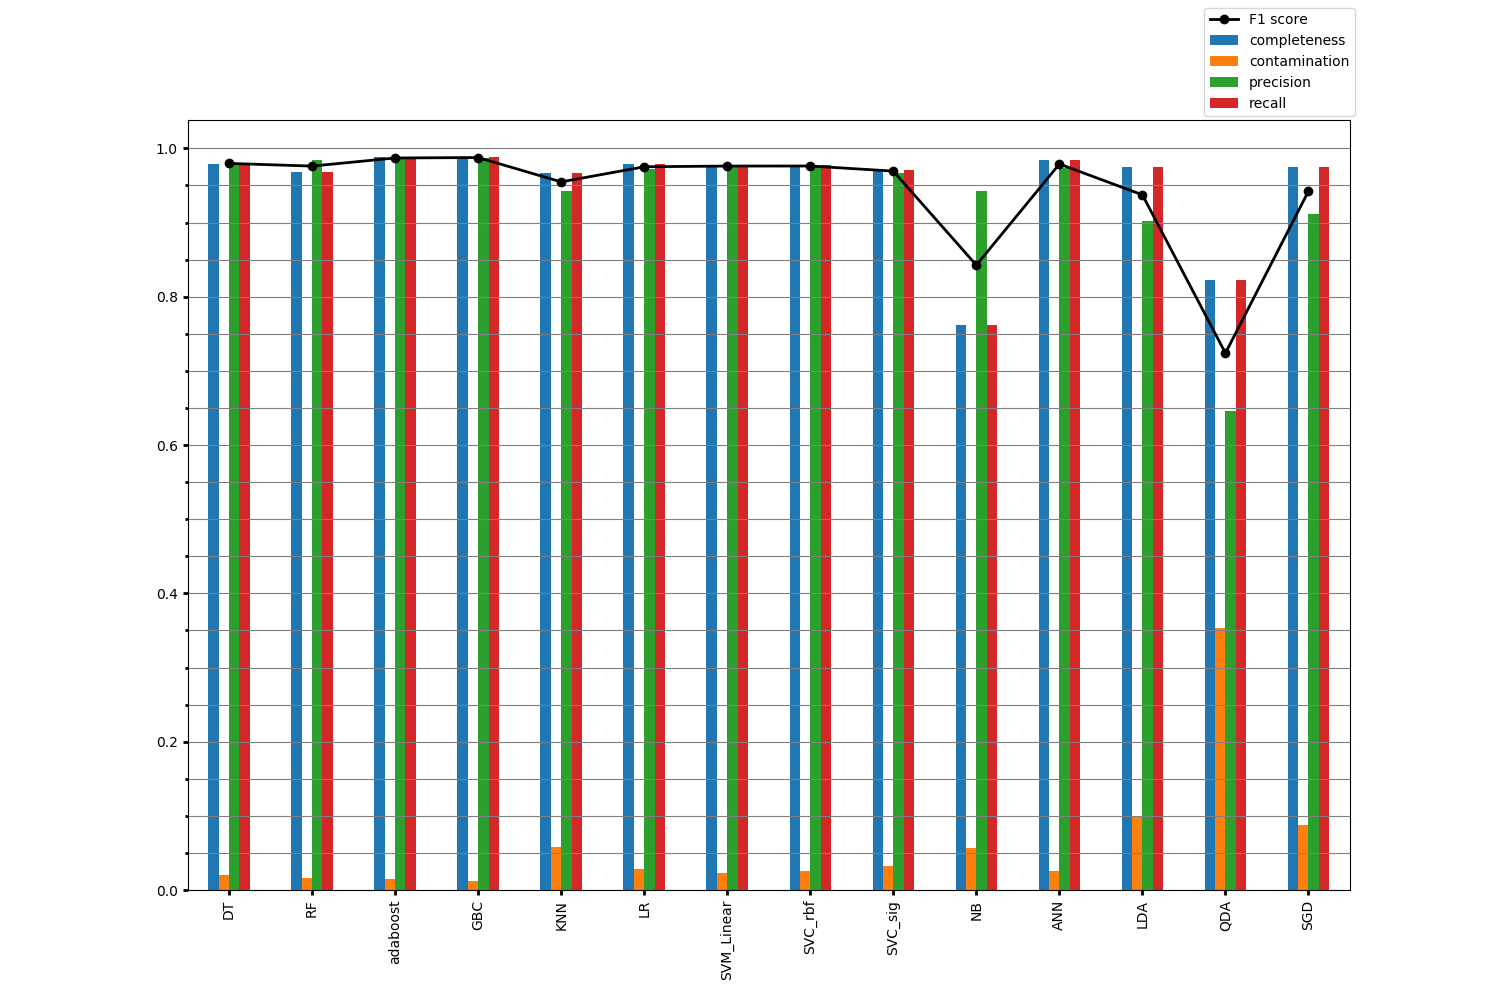

In [14]:
width = .5 # width of a bar

m1_t = pd.DataFrame({
 'accuracy' : [score_DT[1],score_RF[1],score_ADA[1],score_GBC[1],score_KNN[1],score_LOG[1],score_SVM_lin[1],score_SVM_rbf[1],score_SVM_sig[1],
               score_NB[1],score_ANN[1],score_LDA[1],score_QDA[1],score_SGD[1]],
 'completeness' : [score_DT[2],score_RF[2],score_ADA[2],score_GBC[2],score_KNN[2],score_LOG[2],score_SVM_lin[2],score_SVM_rbf[2],score_SVM_sig[2],
               score_NB[2],score_ANN[2],score_LDA[2],score_QDA[2],score_SGD[2]],
 'contamination' : [score_DT[3],score_RF[3],score_ADA[3],score_GBC[3],score_KNN[3],score_LOG[3],score_SVM_lin[3],score_SVM_rbf[3],score_SVM_sig[3],
               score_NB[3],score_ANN[3],score_LDA[3],score_QDA[3],score_SGD[3]],
 'precision' : [score_DT[4],score_RF[4],score_ADA[4],score_GBC[4],score_KNN[4],score_LOG[4],score_SVM_lin[4],score_SVM_rbf[4],score_SVM_sig[4],
               score_NB[4],score_ANN[4],score_LDA[4],score_QDA[4],score_SGD[4]],
 'recall' : [score_DT[5],score_RF[5],score_ADA[5],score_GBC[5],score_KNN[5],score_LOG[5],score_SVM_lin[5],score_SVM_rbf[5],score_SVM_sig[5],
               score_NB[5],score_ANN[5],score_LDA[5],score_QDA[5],score_SGD[5]],
 'F1 score' : [score_DT[6],score_RF[6],score_ADA[6],score_GBC[6],score_KNN[6],score_LOG[6],score_SVM_lin[6],score_SVM_rbf[6],score_SVM_sig[6],
               score_NB[6],score_ANN[6],score_LDA[6],score_QDA[6],score_SGD[6]],
 'ROC AUC score' : [roc_auc_score(y_test, probs_model[0]),roc_auc_score(y_test, probs_model[1]),roc_auc_score(y_test, probs_model[2]),roc_auc_score(y_test, probs_model[3]),
                    roc_auc_score(y_test, probs_model[4]),roc_auc_score(y_test, probs_model[5]),roc_auc_score(y_test, probs_model[6]),roc_auc_score(y_test, probs_model[7]),
                    roc_auc_score(y_test, probs_model[8]),roc_auc_score(y_test, probs_model[9]),roc_auc_score(y_test, probs_model[10]),roc_auc_score(y_test, probs_model[11]),
                    roc_auc_score(y_test, probs_model[12]),roc_auc_score(y_test, probs_model[13])],
 'time span' : [time_2[0]-time_1[0],time_2[1]-time_1[1],time_2[2]-time_1[2],time_2[3]-time_1[3],time_2[4]-time_1[4],time_2[5]-time_1[5],time_2[6]-time_1[6],time_2[7]-time_1[7],time_2[8]-time_1[8],
               time_2[9]-time_1[9],time_2[10]-time_1[10],time_2[11]-time_1[11],time_2[12]-time_1[12],time_2[13]-time_1[13]]
    })

m1_t.rename(index = {0: "Decision Tree", 
                     1: "Random Forest",
                     2: "AdaBoost",
                     3: "Gradient boosting",
                     4: "KNN",
                     5: "Logistic Regression",
                     6: "SVM_Linear",
                     7: "SVM_rbf",
                     8: "SVM_sigmoid",
                     9: "Naive Bayes",
                     10: "ANN",
                     11: "Linear discriminant analysis",
                     12: "Quadratic discriminant analysis",
                     13: "Stochastic Gradient Descent"
                    },inplace = True) 

ax1 = m1_t[['completeness','contamination','precision','recall']].plot(kind='bar', width = width,figsize=(15, 10),legend = False)
ax2 = m1_t['F1 score'].plot(lw=2,style='ko-',legend = False)

# ax1.xlim([-width, len(m1_t['completeness'])-width])
ax1.legend(bbox_to_anchor=(1.01, 1.155))
ax1.set_xticklabels(('DT', 'RF', 'adaboost', 'GBC', 'KNN', 'LR', 'SVM_Linear', 'SVC_rbf', 'SVC_sig', 'NB', 'ANN', 'LDA', 'QDA','SGD'),rotation=90)
ax1.grid(axis='y', which='both', color='gray', linestyle='-')
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.set_xlim(-0.5,14-0.5)

plt.show()

In [ ]:
m1_t

# Testing Area

<IPython.core.display.Javascript object>


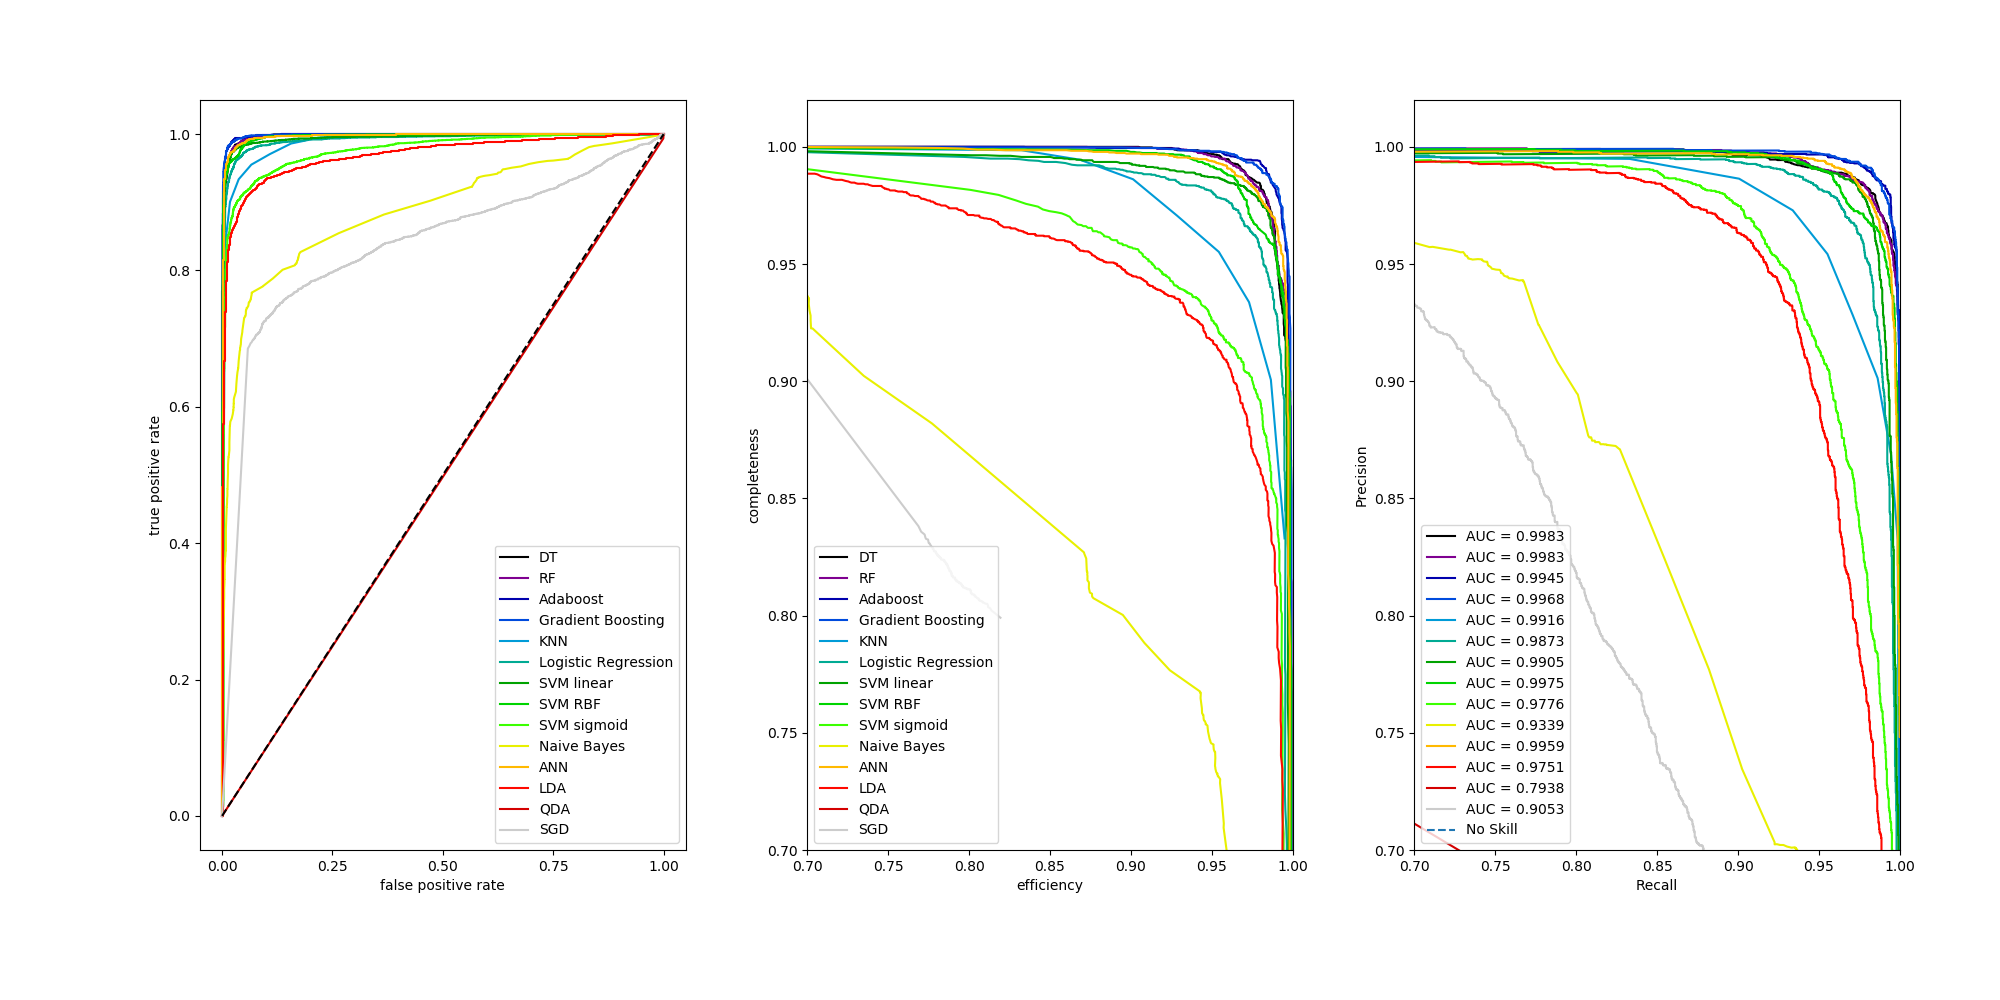

In [17]:
from sklearn.metrics import auc
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


ytest =y_test
# ax2 will show roc curves
ax1 = plt.subplot(131)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(132)

# ax1 will show completeness/efficiency
ax3 = plt.subplot(133)

labels = dict(
              decision_tree= 'DT',
              RandomForestClassifier= 'RF',
              Adaboost_Classifier="Adaboost",
              Gradient_boosting_Classifier='Gradient Boosting',
              K_Nearest_Neighbors= 'KNN',
              LogisticRegression= 'Logistic Regression',
              SVM_Linear= 'SVM linear',
              SVM_RBF='SVM RBF',
              SVM_sigmoid= 'SVM sigmoid',
              BernoulliNB= 'Naive Bayes',
              neural_network= 'ANN',
              LDA= 'LDA',
              QDA= 'QDA',
              SGD= 'SGD'
             )

thresholds = np.linspace(0, 1, 1001)[:-1]

colors = cm.nipy_spectral(np.linspace(0, 1, len(names_model)))
# colors = cms.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cms.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob,y_pred, c in zip(names_model, probs_model,pred_model,colors):
    fpr, tpr, thresh = roc_curve(ytest, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])
    
    prec_cur, rec_cur, _ = precision_recall_curve(ytest, y_prob)
    aucc = auc(rec_cur, prec_cur)
    ax3.plot(rec_cur, prec_cur,color=c, label=f'AUC = {round(aucc,4)}')#label=labels[name],
    ax1.plot(fpr, tpr, label=labels[name],color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, ytest)
    ax2.plot(1 - cont, comp, label=labels[name],color=c)
    
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
no_skill = len(ytest[ytest==1]) / len(ytest)
ax3.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax1.legend(loc=4)
ax2.legend(loc=3)
ax3.legend(loc=3)
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')
# ax2.set_xlim(0, 1.0)
# ax2.set_ylim(0, 1.02)
# ax1.set_xlim(0, 1.0)
# ax1.set_ylim(0, 1.02)
# ax3.set_xlim(0, 1.0)
# ax3.set_ylim(0, 1.02)
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)
ax3.set_xlim(0.7, 1.0)
ax3.set_ylim(0.7, 1.02)
plt.show()